<a href="https://colab.research.google.com/github/Nandhu2k3/Deeplearning/blob/main/Implement_Linear_regression_with_stochastic_gradient_desent5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


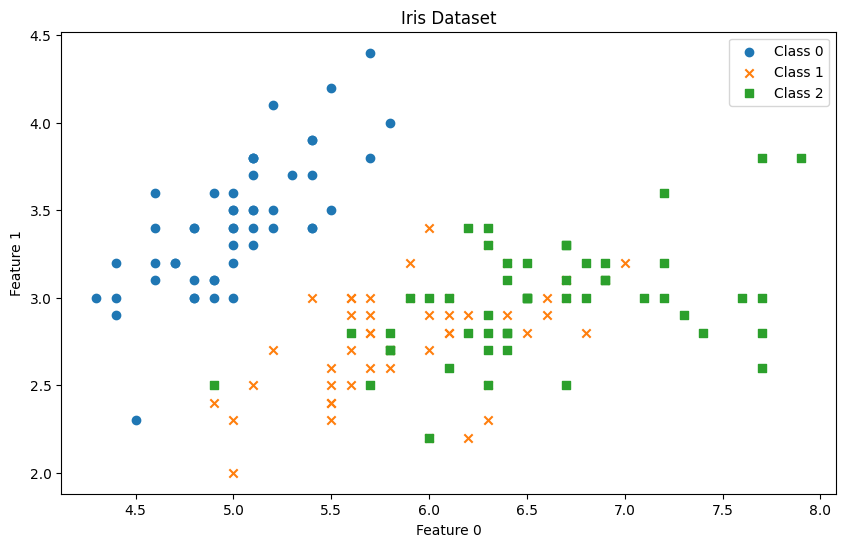

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
x = data.data
y = data.target

plt.figure(figsize=(10, 6))

plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Class 0", marker="o")

plt.scatter(x[y == 1, 0], x[y == 1, 1], label="Class 1", marker="x")

plt.scatter(x[y == 2, 0], x[y == 2, 1], label="Class 2", marker="s")

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Iris Dataset")
plt.legend()
plt.show()


In [ ]:
def linear_regression_sgd(x, y, learning_rate, epochs):
    n_samples, n_features = x.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(epochs):
        for i in range(n_samples):
            sample_idx = np.random.randint(n_samples)
            prediction = np.dot(weights, x[sample_idx]) + bias
            error = y[sample_idx] - prediction
            gradient_w = error * x[sample_idx]
            gradient_b = error
            weights += learning_rate * gradient_w
            bias += learning_rate * gradient_b

    return weights, bias




In [ ]:
def linear_regression_mini_batch_sgd(x, y, learning_rate, epochs, batch_size):
    n_samples, n_features = x.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(epochs):
        for i in range(0, n_samples, batch_size):
            batch_indices = np.random.choice(n_samples, batch_size, replace=False)
            batch_x = x[batch_indices]
            batch_y = y[batch_indices]
            prediction = np.dot(batch_x, weights) + bias
            error = batch_y - prediction
            gradient_w = np.dot(error, batch_x)
            gradient_b = np.sum(error)
            weights += learning_rate * gradient_w
            bias += learning_rate * gradient_b

    return weights, bias


In [ ]:
def main():
    data = load_iris()
    x = data.data
    y = data.target

    target_class = 0
    y = x[:, target_class]

    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

    sgd_weights, sgd_bias = linear_regression_sgd(train_x, train_y, 0.001, 1000)
    mini_batch_weights, mini_batch_bias = linear_regression_mini_batch_sgd(train_x, train_y, 0.001, 1000, 10)

    print("SGD Weights:", sgd_weights)
    print("SGD Bias:", sgd_bias)

    print("Mini-Batch SGD Weights:", mini_batch_weights)
    print("Mini-Batch SGD Bias:", mini_batch_bias)

    sgd_predictions = np.dot(test_x, sgd_weights) + sgd_bias
    mini_batch_predictions = np.dot(test_x, mini_batch_weights) + mini_batch_bias

    sgd_rmse = np.sqrt(mean_squared_error(test_y, sgd_predictions))
    mini_batch_rmse = np.sqrt(mean_squared_error(test_y, mini_batch_predictions))

    print("SGD RMSE:", sgd_rmse)
    print("Mini-Batch SGD RMSE:", mini_batch_rmse)

if __name__ == "__main__":
    main()


SGD Weights: [ 0.98403991  0.00249035  0.01235798 -0.01516978]
SGD Bias: 0.05782083324804935
Mini-Batch SGD Weights: [ 0.98402451  0.00236321  0.01249193 -0.01521267]
Mini-Batch SGD Bias: 0.056947370150319955
SGD RMSE: 0.00628501565538182
Mini-Batch SGD RMSE: 0.006488717061887647


NameError: ignored